# P5: Verification of Malus' Law of Polarization

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [107]:
# enter the angle theta from the phi

theta = np.arange(0, 360, 10)

cos_theta = np.cos(np.deg2rad(theta))

voltages = np.array([
  167,163,155,145,125,104,80,60,47,46,56,75,97,117,134,151,161,167,168,161,150,135,115,93,71,52,46,45,57,84,104,123,142,153,162,166
])

cos_squared = np.round((cos_theta**2)[0:10],2)
volts = voltages[0:10]

In [108]:
def line(x, m, c):
    return m * x + c

def invline(y, m, c):
    return (y - c) / m

def least_squares(x, y):
    m = (len(x) * np.sum(x * y) - np.sum(x) * np.sum(y)) / (len(x) * np.sum(x**2) - np.sum(x)**2)
    c = (np.sum(y) - m * np.sum(x)) / len(x)
    return m, c
  
m, c = least_squares(cos_squared, volts)
print(f"m = {m}, c = {c}")

m = 123.38533313894159, c = 47.50733343052921


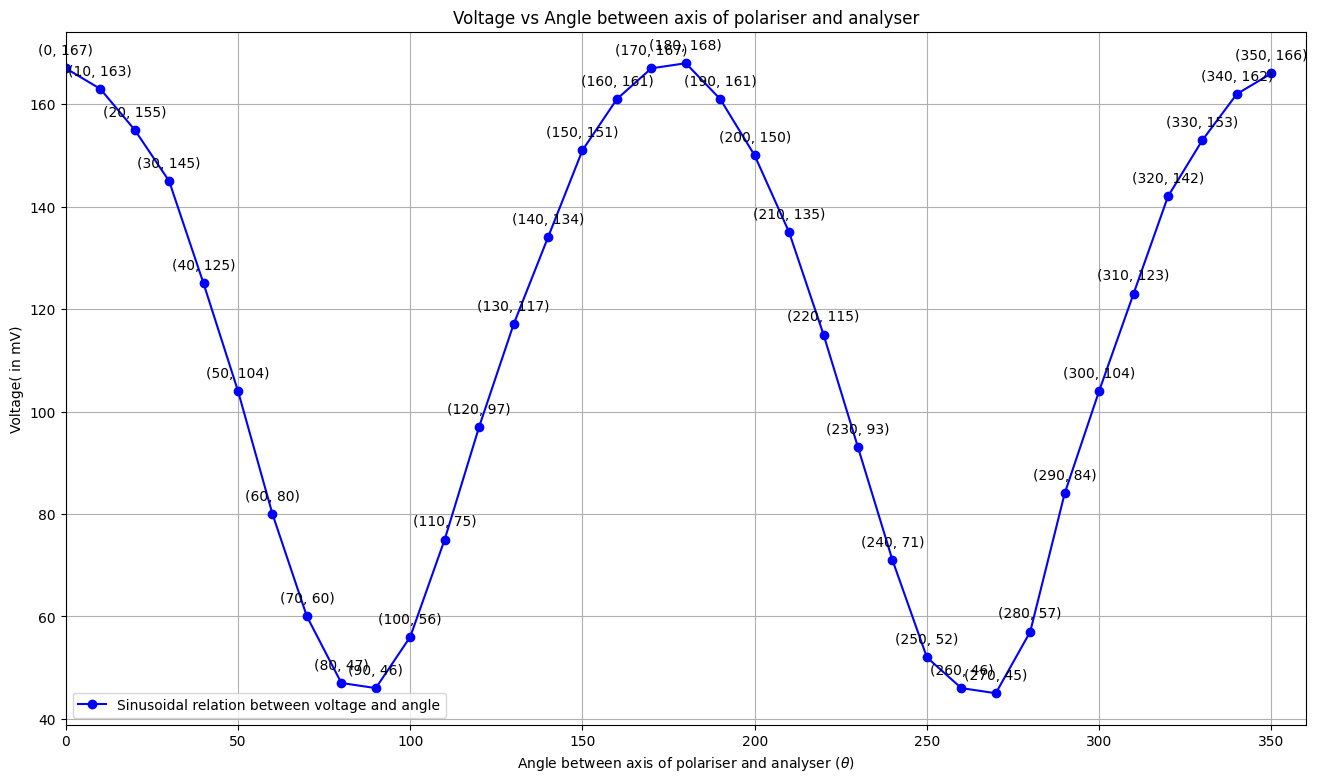

In [109]:
plt.figure(figsize=(16, 9))

plt.plot(theta, voltages, 'bo-', label='Sinusoidal relation between voltage and angle')
plt.xlabel(r'Angle between axis of polariser and analyser $(\theta)$')
plt.ylabel('Voltage( in mV)')
plt.title('Voltage vs Angle between axis of polariser and analyser')

plt.xlim(0, 360)

for x, y in zip(theta, voltages):
  label = f"({x}, {y})"
  plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')
  
plt.grid()
plt.legend()
plt.show()

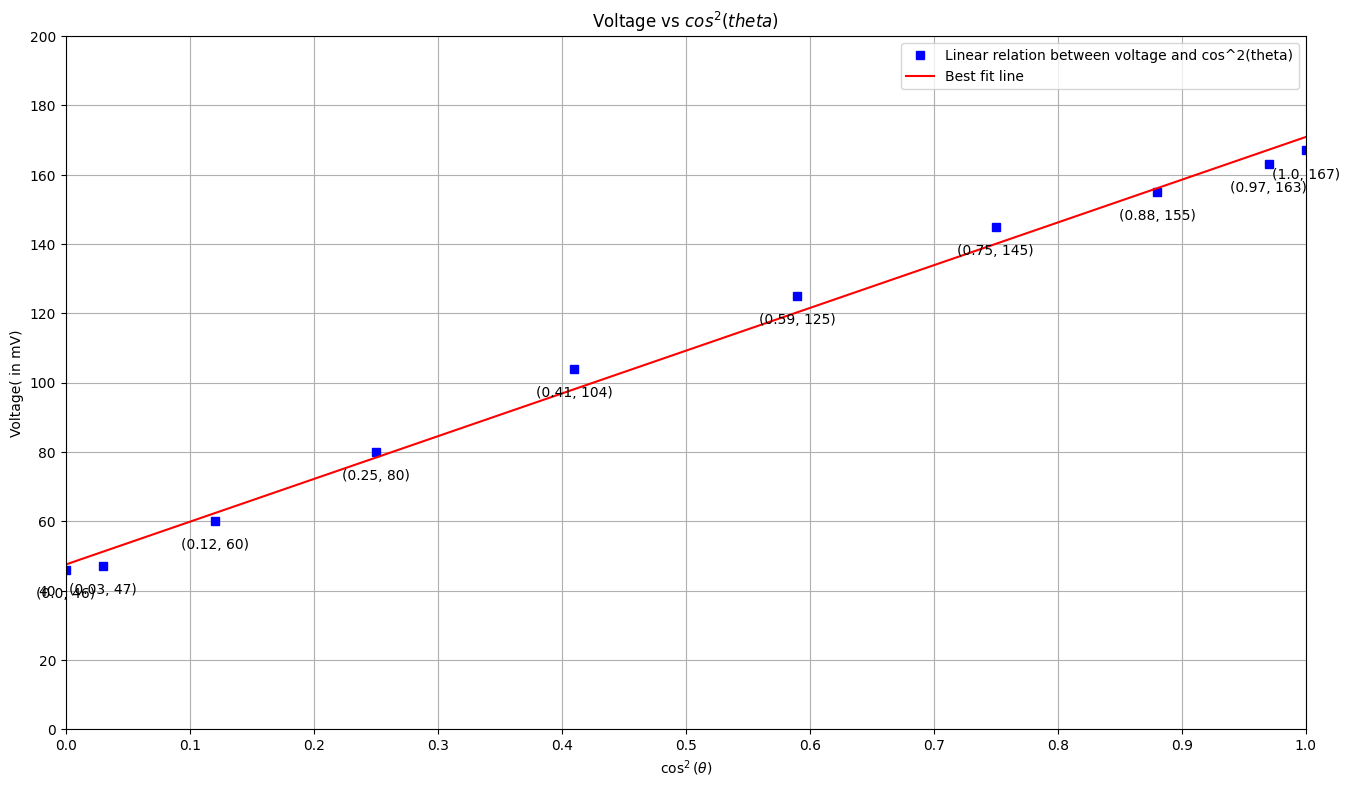

In [110]:
plt.figure(figsize=(16, 9))

plt.plot(cos_squared, volts, 'bs', label='Linear relation between voltage and cos^2(theta)')
plt.xlabel(r'$\cos^2(\theta)$')
plt.ylabel('Voltage( in mV)')
plt.title('Voltage vs $cos^2(theta)$')

plt.xlim(0, 1)
plt.ylim(0, 200)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 210, 20))

for x, y in zip(cos_squared, volts):
  label = f"({x}, {y})"
  plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,-20), ha='center')

plt.plot(cos_squared, line(cos_squared, m, c), 'r-', label='Best fit line')
plt.grid()
plt.legend()
plt.show()